# Data generation for the report
## Importing data

Data is imported from two files, and at import they are assigned their labels
0 for fake, 1 for real

The processing happens in the ```text_data``` class, which is from the ```train.py``` file

In [1]:
%matplotlib inline
from train import text_data
from pathlib import Path


fake_data = text_data(Path("./datasets/1/Fake.csv"), 0)
true_data = text_data(Path("./datasets/1/True.csv"), 1)
# I overloaded the + operator to append the labels, and to concatenate the Pandas DataFrames
combined_data = fake_data + true_data
combined_data.process_to_x()
combined_data.preprocess(combined_data._nlp_x)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yaseen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to .cache\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to .cache\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Checking for Fake.csv_True.csv...
Unpickled old file. If this wasn't your intention, delete the crc files in .cache/crc
Count (44898, 125654)
tfidf (44898, 125654)


## Decision tree classifier, untweaked

In [2]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import cross_validate, train_test_split
from matplotlib import pyplot as plt

dtree = DecisionTreeClassifier(criterion="entropy")

scores_dtree = cross_validate(
	dtree,
	combined_data.x_preprocessed_tfidf,
	combined_data._label,
	cv=10,
	return_train_score=True,
	n_jobs=-1, # Runs jobs in parallel, so it completes faster
)

In [4]:
def print_cross_val_scores(scores):
	for key, value in scores.items():
		nature = "" if key.endswith("score") else " seconds"
		print(
			f"{key.replace('_',' ').capitalize()} of {value.mean():.5f}{nature} with a standard deviation of {value.std():.5f}"
		)
		if not nature:
			print(f"Lowest was {value.min():.5f}, and highest was {value.max():.5f}")

print_cross_val_scores(scores_dtree)


Fit time of 28.44201 seconds with a standard deviation of 2.37631
Score time of 0.03230 seconds with a standard deviation of 0.00297
Test score of 0.99541 with a standard deviation of 0.00369
Lowest was 0.98507, and highest was 0.99844
Train score of 1.00000 with a standard deviation of 0.00000
Lowest was 1.00000, and highest was 1.00000


In [5]:
from sklearn.metrics import classification_report


def generate_report(clf, target_names=None, X_data=combined_data.x_preprocessed_tfidf, y_data=combined_data._label):
	X_train, X_test, y_train, y_test = train_test_split(
		X_data, y_data, test_size=0.2
	)
	clf.fit(X_train, y_train)
	y_pred = clf.predict(X_test)
	print(classification_report(y_test, y_pred, target_names=target_names))
	return (clf, y_test, y_pred)


clf, y_test, y_pred = generate_report(dtree, target_names=["Fake", "Real"])


              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4745
        Real       1.00      1.00      1.00      4235

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



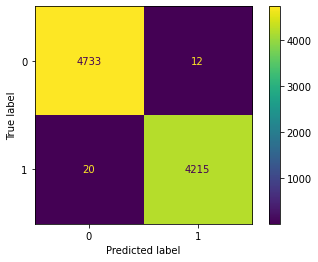

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def display_confusion_matrix(y_test, y_pred, display_labels=None):
	cm = confusion_matrix(y_test, y_pred)
	disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
	disp.plot()

display_confusion_matrix(y_test,y_pred,clf.classes_)


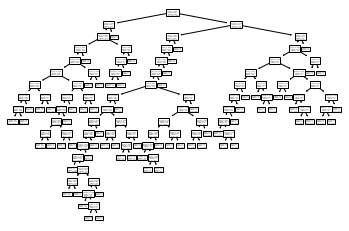

In [6]:
plt.figure()
_ = plot_tree(clf)

## Decision tree classifier, tweaked

Iteration 1:
Max depth 20, min samples split 1000, min samples leaf 750
Fit time of 15.55230 seconds with a standard deviation of 1.22958
Score time of 0.04910 seconds with a standard deviation of 0.00817
Test score of 0.99214 with a standard deviation of 0.00337
Train score of 0.99251 with a standard deviation of 0.00031
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      4693
        Real       0.99      1.00      0.99      4287

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



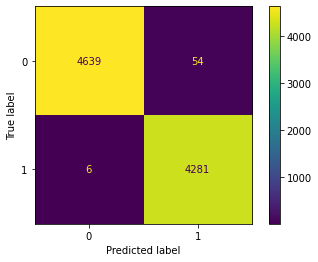

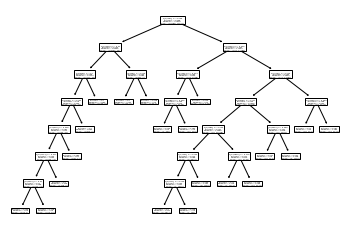

Iteration 2:
Max depth 16, min samples split 3000, min samples leaf 2250
Fit time of 10.80267 seconds with a standard deviation of 1.52000
Score time of 0.03680 seconds with a standard deviation of 0.00481
Test score of 0.99214 with a standard deviation of 0.00337
Train score of 0.99251 with a standard deviation of 0.00031
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      4670
        Real       0.99      1.00      0.99      4310

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



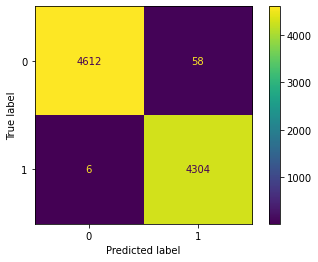

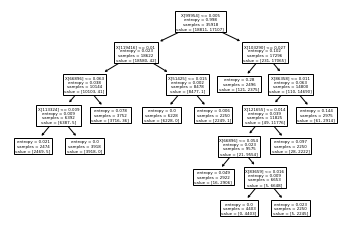

Iteration 3:
Max depth 12, min samples split 5000, min samples leaf 3750
Fit time of 9.45262 seconds with a standard deviation of 1.04637
Score time of 0.04270 seconds with a standard deviation of 0.00914
Test score of 0.99214 with a standard deviation of 0.00337
Train score of 0.99251 with a standard deviation of 0.00031
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      4700
        Real       0.99      1.00      0.99      4280

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



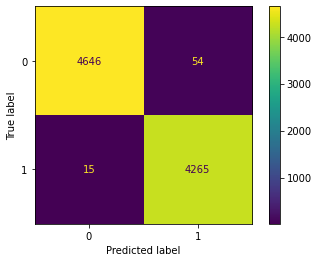

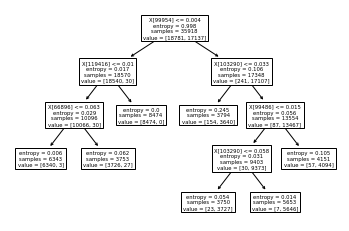

Iteration 4:
Max depth 8, min samples split 7000, min samples leaf 5250
Fit time of 9.01722 seconds with a standard deviation of 1.47248
Score time of 0.03990 seconds with a standard deviation of 0.00675
Test score of 0.99214 with a standard deviation of 0.00337
Train score of 0.99251 with a standard deviation of 0.00031
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      4683
        Real       0.98      1.00      0.99      4297

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



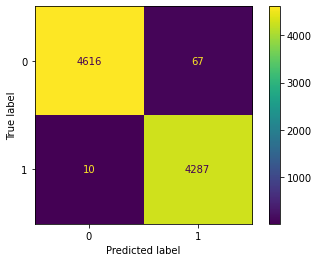

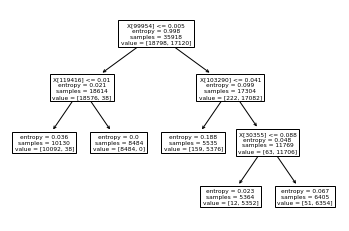

In [10]:
tweaks = 4
for j in range(tweaks):
	max_depth = 20 - j * 4
	min_sam_split = 1000 + j * 2000
	min_sam_leaf = 750 + j * 1500
	print(
		f"Iteration {j+1}:\nMax depth {max_depth}, min samples split {min_sam_split}, min samples leaf {min_sam_leaf}"
	)
	dtree_tweaked = DecisionTreeClassifier(
		criterion="entropy",
		max_depth=max_depth,
		min_samples_split=min_sam_split,
		min_samples_leaf=min_sam_leaf,
	)
	scores_dtree_tweaked = cross_validate(
		dtree_tweaked,
		combined_data.x_preprocessed_tfidf,
		combined_data._label,
		cv=10,
		return_train_score=True,
		n_jobs=-1,
	)
	print_cross_val_scores(scores_dtree_tweaked)
	clf, y_test, y_pred = generate_report(dtree_tweaked, ["Fake", "Real"])
	display_confusion_matrix(y_test, y_pred, clf.classes_)

	plt.figure()
	_ = plot_tree(dtree_tweaked)
	plt.show()


## KNN Classifier

_*don't run this*_

it used 8.5 Gb of RAM and ran for a long long time. I had to move it to my main PC to even run, otherwise it'd crash my laptop

Fit time of 0.16960 seconds with a standard deviation of 0.01026
Score time of 36.80230 seconds with a standard deviation of 3.45647
Test score of 0.81839 with a standard deviation of 0.06576
Train score of 0.92472 with a standard deviation of 0.00745
              precision    recall  f1-score   support

        Fake       0.92      0.85      0.88      4635
        Real       0.85      0.92      0.89      4345

    accuracy                           0.88      8980
   macro avg       0.89      0.89      0.88      8980
weighted avg       0.89      0.88      0.88      8980



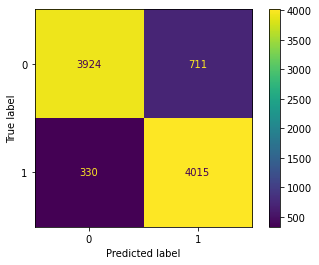

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

scores_knn = cross_validate(
	knn,
	combined_data.x_preprocessed_tfidf,
	combined_data._label,
	cv=10,
	return_train_score=True,
	n_jobs=-1, # Runs jobs in parallel, so it completes faster
)
print_cross_val_scores(scores_knn)
clf, y_test, y_pred = generate_report(knn, ["Fake", "Real"])
display_confusion_matrix(y_test, y_pred, clf.classes_)

# Naive Bayes
Since textual data works better with Naive Bayes Complement we will first do gaussian, multinomial, then complement. We expect the score to be high in all cases as it has been high with other less successful classifiers, but maybe the complement and multinomial will have a tighter distribution and standard deviation.

Gaussian fails because most of the items are 0s in this matrix. We can still run it by converting the sparse matrix to a dense matrix, but that requires a lot of space (42 GiB of ram) so let's not do that...

In [8]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()

scores_gaussian_nb = cross_validate(
	gaussian_nb,
	combined_data.x_preprocessed_tfidf.todense(),
	combined_data._label.todense(),
	cv=10,
	return_train_score=True,
	n_jobs=-1, # Runs jobs in parallel, so it completes faster
)
print_cross_val_scores(scores_gaussian_nb)
clf, y_test, y_pred = generate_report(gaussian_nb, ["Fake", "Real"])
display_confusion_matrix(y_test, y_pred, clf.classes_)

MemoryError: Unable to allocate 42.0 GiB for an array with shape (44898, 125654) and data type float64

Fit time of 0.21140 seconds with a standard deviation of 0.02218
Score time of 0.01500 seconds with a standard deviation of 0.00224
Test score of 0.93006 with a standard deviation of 0.04113
Lowest was 0.83274, and highest was 0.97728
Train score of 0.95684 with a standard deviation of 0.00131
Lowest was 0.95454, and highest was 0.95880
              precision    recall  f1-score   support

        Fake       0.94      0.96      0.95      4600
        Real       0.96      0.94      0.95      4380

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



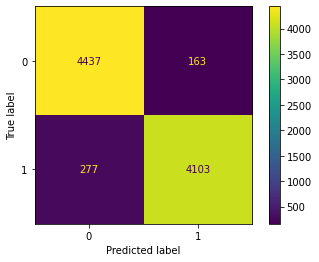

In [9]:
from sklearn.naive_bayes import MultinomialNB

multinomial_nb = MultinomialNB()

scores_multinomial_nb = cross_validate(
	multinomial_nb,
	combined_data.x_preprocessed_tfidf,
	combined_data._label,
	cv=10,
	return_train_score=True,
	n_jobs=-1, # Runs jobs in parallel, so it completes faster
)
print_cross_val_scores(scores_multinomial_nb)
clf, y_test, y_pred = generate_report(multinomial_nb, ["Fake", "Real"])
display_confusion_matrix(y_test, y_pred, clf.classes_)

Fit time of 0.28220 seconds with a standard deviation of 0.06367
Score time of 0.01580 seconds with a standard deviation of 0.00199
Test score of 0.93073 with a standard deviation of 0.03899
Lowest was 0.83942, and highest was 0.97483
Train score of 0.95731 with a standard deviation of 0.00134
Lowest was 0.95543, and highest was 0.95951
              precision    recall  f1-score   support

        Fake       0.94      0.96      0.95      4669
        Real       0.95      0.93      0.94      4311

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



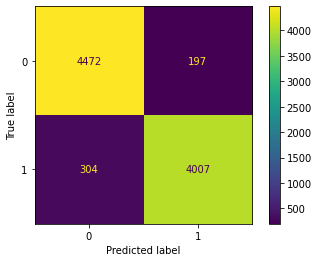

In [11]:
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB()

scores_complement_nb = cross_validate(
	complement_nb,
	combined_data.x_preprocessed_tfidf,
	combined_data._label,
	cv=10,
	return_train_score=True,
	n_jobs=-1, # Runs jobs in parallel, so it completes faster
)
print_cross_val_scores(scores_complement_nb)
clf, y_test, y_pred = generate_report(complement_nb, ["Fake", "Real"])
display_confusion_matrix(y_test, y_pred, clf.classes_)

# Support Vector Machine
First linear, then non-linear. Don't run this with a full dataset. I had to stop it when it reached 50 mins to train...

In [12]:
from sklearn.utils import shuffle
cut_down_data, cut_down_labels = shuffle(combined_data.x_preprocessed_tfidf,combined_data._label,n_samples=10000)

Fit time of 51.84391 seconds with a standard deviation of 2.05369
Score time of 5.05921 seconds with a standard deviation of 0.64720
Test score of 0.98960 with a standard deviation of 0.00191
Lowest was 0.98600, and highest was 0.99200
Train score of 0.99781 with a standard deviation of 0.00029
Lowest was 0.99756, and highest was 0.99856
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      1026
        Real       0.99      0.99      0.99       974

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



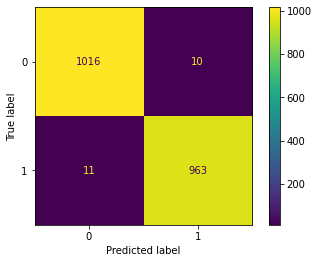

In [13]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

scores_svc = cross_validate(
	svc,
	cut_down_data,
	cut_down_labels,
	cv=10,
	return_train_score=True,
	n_jobs=-1, # Runs jobs in parallel, so it completes faster
)
print_cross_val_scores(scores_svc)
clf, y_test, y_pred = generate_report(svc, ["Fake", "Real"], X_data = cut_down_data, y_data = cut_down_labels)
display_confusion_matrix(y_test, y_pred, clf.classes_)

Training SVC for degree 2
Fit time of 49.65984 seconds with a standard deviation of 3.92451
Score time of 5.55561 seconds with a standard deviation of 0.73435
Test score of 0.98960 with a standard deviation of 0.00191
Lowest was 0.98600, and highest was 0.99200
Train score of 0.99781 with a standard deviation of 0.00029
Lowest was 0.99756, and highest was 0.99856
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      1015
        Real       0.99      0.99      0.99       985

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Training SVC for degree 3
Fit time of 131.88986 seconds with a standard deviation of 10.21714
Score time of 9.92191 seconds with a standard deviation of 1.10467
Test score of 0.98490 with a standard deviation of 0.00247
Lowest was 0.98200, and highest was 0.98900
Train score of 0.99922 with a standard devi

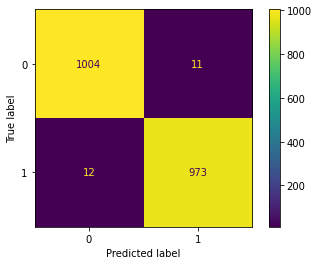

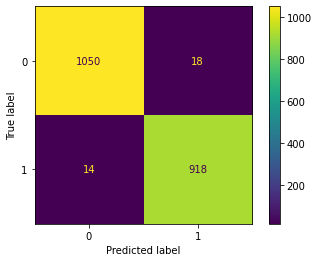

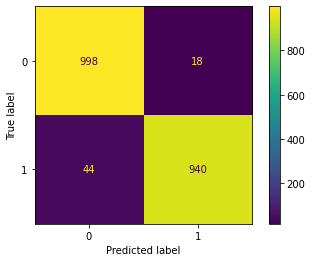

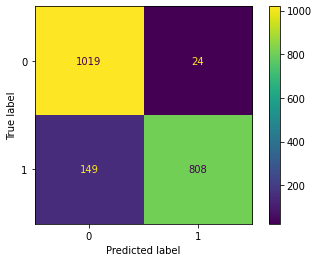

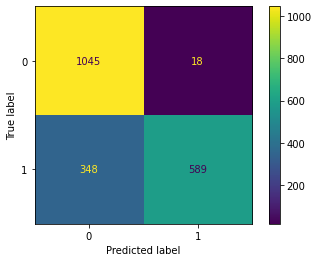

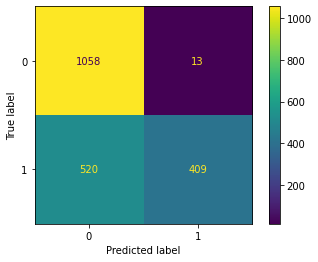

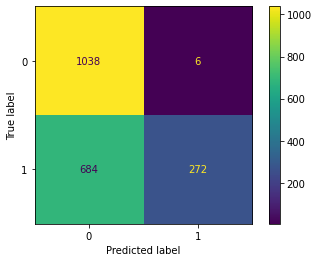

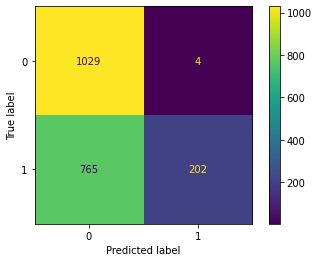

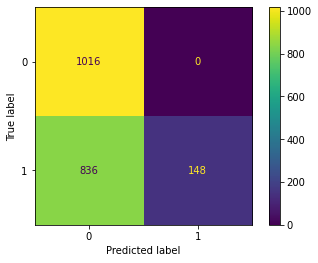

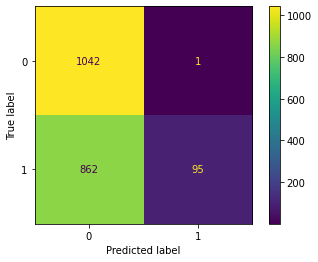

In [14]:
for deg in range(1,11): # Repeat for 10 degrees
	print(f"Training SVC for degree {deg+1}")
	svc = SVC(kernel='poly', degree=deg)

	scores_svc = cross_validate(
		svc,
		cut_down_data,
		cut_down_labels,
		cv=10,
		return_train_score=True,
		n_jobs=-1, # Runs jobs in parallel, so it completes faster
	)
	print_cross_val_scores(scores_svc)
	clf, y_test, y_pred = generate_report(svc, ["Fake", "Real"], X_data = cut_down_data, y_data = cut_down_labels)
	display_confusion_matrix(y_test, y_pred, clf.classes_)